In [1]:
from plotnine import ggplot, aes, geom_point, labs, facet_wrap, geom_vline, theme_minimal, theme, element_text
import pandas as pd

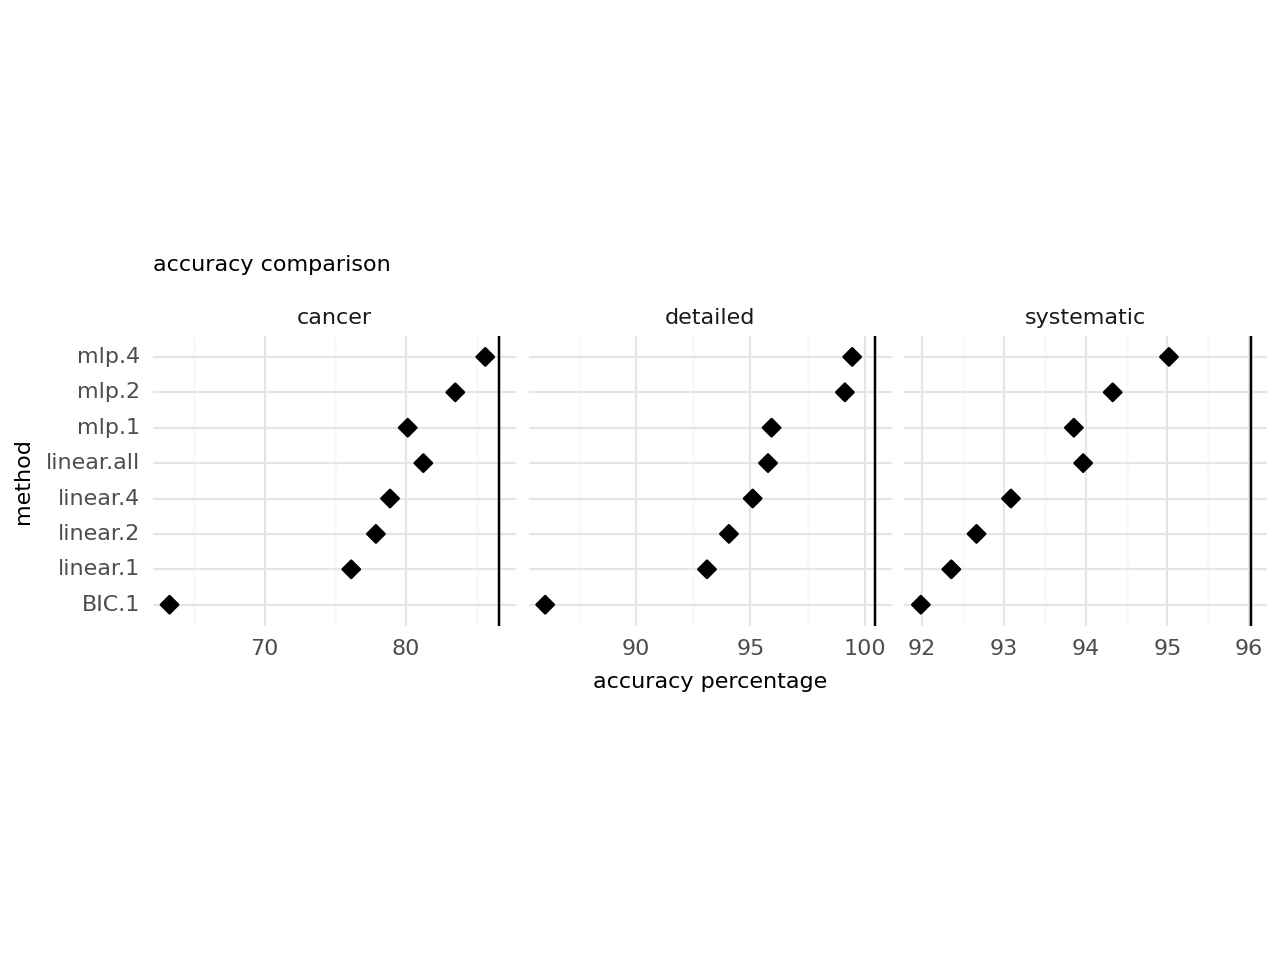

In [2]:
cancer_df = pd.read_csv('acc_rate/cancer_condensed.csv')
cancer_df['dataset'] = 'cancer'

detailed_df = pd.read_csv('acc_rate/detailed_condensed.csv')
detailed_df['dataset'] = 'detailed'

systematic_df = pd.read_csv('acc_rate/systematic_condensed.csv')
systematic_df['dataset'] = 'systematic'

final_df = pd.concat([cancer_df, detailed_df, systematic_df])
final_df = final_df[final_df['feature'] == 'feature engineering']

# Calculate maximum accuracy for each dataset
max_acc_per_dataset = final_df.groupby('dataset')['acc'].max().reset_index()
max_acc_per_dataset['acc'] = max_acc_per_dataset['acc'] + 1

plot_combined = (ggplot(final_df, aes(x='acc', y='method')) +
                 geom_point(shape="D", size=2) +
                 labs(title="accuracy comparison",
                      x="accuracy percentage",
                      y="method") +
                 facet_wrap('~dataset', ncol=final_df['dataset'].nunique(), scales='free_x') +
                 theme_minimal() +
                 theme(legend_position='bottom', text=element_text(size=8)) +
                 theme(aspect_ratio=0.8) +
                 geom_vline(data=max_acc_per_dataset, mapping=aes(xintercept='acc'), color='black')
                 )

print(plot_combined)